# Redes neuronales

La estructura de una red neuronal es mediante el uso de **capas**, formadas a su vez por **neuronas**. Cada neurona, 
realiza una operación sencilla y está conectada a las neuronas de la capa anterior y de la capa siguiente mediante **pesos**, 
cuya función es regular la información que se propaga de una neurona a otra.


La primera capa de la red neuronal (color rojo) se conoce como capa de entrada y recibe el valor de los predictores *X*. La capa intermedia (color azul), recibe los valores de la capa de entrada, ponderados por los pesos *W*. La capa de salida (color verde), combina los valores que salen de la capa intermedia para generar la predicción *Y*.



<center><div> <img src="fig/red.jpeg" alt="Drawing" style="width: 600px;"/></div><center>


La **neurona** es la unidad funcional de los modelos de redes. Dentro de cada neurona, ocurren simplemente dos operaciones: la suma ponderada de sus entradas y la aplicación de una función de activación.

En la primera parte, se multiplica cada valor de entrada  $x_i$ por su peso asociado  $w_i$  y se suman junto con el umbral. Este es el valor neto de entrada a la neurona. A continuación, este valor se pasa por una función, conocida como función de activación, que transforma el valor neto de entrada en un valor de salida.

Si bien el valor que llega a la neurona, multiplicación de los pesos por las entradas, siempre es una combinación lineal, gracias a la función de activación, se pueden generar salidas muy diversas. Es en la función de activación donde reside el potencial de los modelos de redes para aprender relaciones no lineales.

El valor neto de entrada a una neurona es la suma de los valores que le llegan, ponderados por el peso de las conexiones, más el bias.
$
\begin{equation}
entrada = \sum_{i = 1}^{n} x_i w_i +b
\end{equation}
$

A este valor se le aplica una función de activación (g) que lo transforma en lo que se conoce como valor de activación (a), que es lo que finalmente sale de la neurona.

$
\begin{equation}
a = g(entrada) = g(\mathbf{XW}+b)
\end{equation}
$

La función activación calcula el estado de actividad de una neurona; transformando la entrada global (menos el umbral)en un valor (estado) de
activación, cuyo rango normalmente va de (0 a 1) o de (–1 a 1). Esto es así, porque una neurona puede estar totalmente inactiva (0 o –1) o activa (1).



## Función de activación 

La función activación, es una función de la entrada global ($gin_i$) menos el umbral ($\theta_i$). Las funciones de activación más utilizadas son: 

### 1. Función lineal

### 2. Función sigmoidea
 
### 3. Función tangente hiperbólica

<center><div> <img src="fig/activ.png" alt="Drawing" style="width: 600px;"/></div><center>



## Función de salida 

La función de salida determina que valor se transfiere a las neuronas vinculadas. Si la función de activación está por debajo de un umbral determinado, ninguna salida se pasa a la neurona subsiguiente. Normalmente, no cualquier valor es permitido como una entrada para una neurona, por lo tanto, los valores de salida están comprendidos en el rango [0, 1] o [-1, 1]. También pueden ser binarios {0, 1} o {-1, 1}.

Las funciones de salida más comunes son:

### 1. Función identidad : este es el tipo de función más sencillo, tal que la salida es la misma que la entrada.
### 2. Binaria : 1 si la función de activación es mayor que el umbral y 0 si no.

## Función de coste o pérdida


Es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

### 1. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. 
### 2. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.

## Entrenamiento


El proceso de entrenamiento de una red neuronal consiste en ajustar el valor de los pesos y el umbral de tal forma que, las predicciones que se generen, tengan el menor error posible. 

### 1. Iniciar la red con valores aleatorios de los pesos y el umbral

### 2. Para cada observación de entrenamiento (X,y), calcular el error que comete la red al hacer sus predicciones. 

### 3. Promediar los errores de todas las observaciones.

### 4. Identificar la responsabilidad que ha tenido cada peso y el umbral en el error de la predicción.

### 5. Modificar los pesos y el umbral de la red (de forma proporcional a su responsabilidad en el error) en la dirección correcta para que se reduzca el error.

### 6. Repetir los pasos 2, 3, 4 y 5 hasta que la red sea suficientemente buena, utilizando el algoritmo de retropropagación (backpropagation) y la optimización por descenso de gradiente (gradient descent).

## Backpropagation


Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y el umbral de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente.

La derivada parcial del error respecto a un parámetro (umbral) mide cuanta "responsabilidad" ha tenido ese parámetro en el error cometido e identificar qué pesos de la red hay que modificar para mejorarla, utilizando el descenso de gradiente.

## Descenso de gradiente


Descenso de gradiente (gradient descent) es un algoritmo de optimización que permite minimizar una función haciendo actualizaciones de sus parámetros en la dirección del valor negativo de su gradiente. Aplicado a las redes neuronales, el descenso de gradiente permite ir actualizando los pesos y bías del modelo para reducir su error.


https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
data = pd.read_csv('../datasets/diabetes.csv') 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
target_column = ['Outcome'] 
predictors = list(set(list(data.columns))-set(target_column))
data[predictors] = data[predictors]/data[predictors].max() #normalizado
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [5]:
X = data[predictors].values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       358
           1       0.76      0.66      0.70       179

    accuracy                           0.82       537
   macro avg       0.80      0.78      0.79       537
weighted avg       0.81      0.82      0.81       537



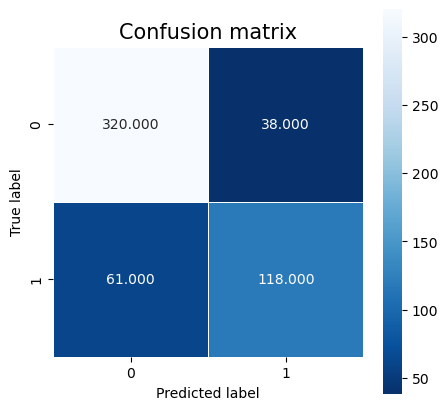

In [27]:
cm = metrics.confusion_matrix(y_train,predict_train)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       142
           1       0.73      0.57      0.64        89

    accuracy                           0.75       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



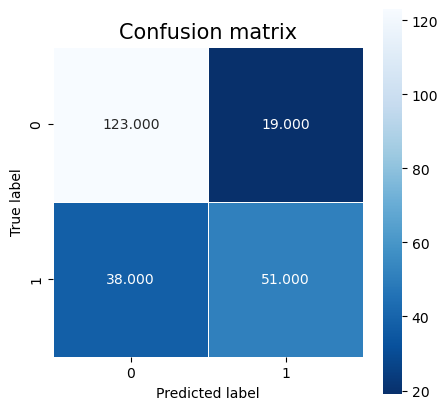

In [28]:
cm = metrics.confusion_matrix(y_test,predict_test)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)
print(classification_report(y_test,predict_test))

In [39]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20,20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 1000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/isadoji/Storage/

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,0.001,10,0.1,0.770833,0.009744,0.786458,0.014470
48,0.001,10,0.01,0.770833,0.018688,0.791667,0.014293
18,0.001,"(10, 10)",1.0,0.770833,0.020752,0.796224,0.014470
42,0.1,"(10, 10)",0.01,0.768229,0.009744,0.850260,0.034290
28,0.1,10,1.0,0.766927,0.019225,0.783203,0.004219
11,0.001,10,1.0,0.764323,0.019488,0.779948,0.002436
25,0.01,10,0.001,0.764323,0.018136,0.804688,0.005750
3,0.01,"(10, 10)",1.0,0.763021,0.019488,0.805990,0.010855
13,0.1,"(10, 10)",0.1,0.761719,0.014616,0.817057,0.012180
14,0.1,10,0.01,0.761719,0.022326,0.795573,0.006445


In [47]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, solver='lbfgs')

In [48]:
mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=(10), activation='relu', solver='lbfgs', max_iter=1000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       142
           1       0.73      0.55      0.63        89

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



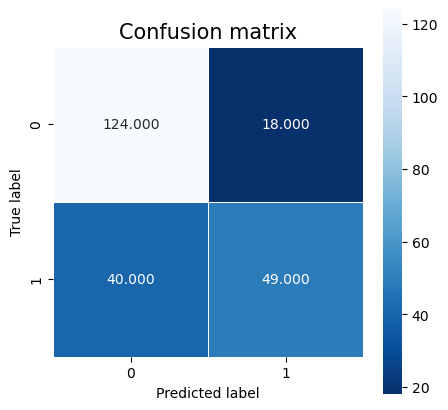

In [49]:
cm = metrics.confusion_matrix(y_test,predict_test)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)
print(classification_report(y_test,predict_test))

### Bibliografía

Redes Neuronales: Conceptos Básicos y Aplicaciones. Damián Jorge Matich (2001)

https://cienciadedatos.net/documentos/py35-redes-neuronales-python